<a href="https://colab.research.google.com/github/Teddy0315/Mission/blob/master/Mission_Submission_V2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mission Submission_김태용


본 수식에서 가장 중요하게 생각한 부분인 r_a와 r_b 각각을 어떻게 처리해야 하는가 에 대한 제고찰을 정리하였습니다.





# 가정

식을 간단하게 하기위해 가상의 유역을 설정하였습니다. 'A' 라는 유역의 정보는 다음과 같습니다.





*   A 유역의 Thickness ($B$) = 0.045 km = 50m

*   A 유역의 장축 ($r_L$) = 50 km = 50000m

* A 유역의 단축 ($r_S$) = 15 km = 15000m

* 유역의 precipition 과 evarporation 의 차 ($w$) = 0.028 km / year = 28 m / year













In [0]:
B = 50 # m
r_L = 50000 # m
r_S = 15000 # m
w = 0.28 # m/yr

또한,  $\,\Delta\, r_a$와 $\,\Delta\, r_b$도 설정해 주었습니다.

* 유역 장축의 측정 지점간 거리차 ($\,\Delta\, r_a$) = 0.5 km = 500 m

* 유역 단축의 측정 지점간 거리차 ($\,\Delta\, r_b$) = 0.15 km = 150 m 

In [0]:
delta_r_a = 500 # m
delta_r_b = 150 # m

# Single domain model


다음 수식들은 time_avg 을 구하는데 필요한 수식들입니다.


* <h3> $Q_R \,= \,\pi(r_Lr_S - r_ar_b)w$ 

* <h3> $L_r \, = \, \pi[3(r_a + r_b) - \sqrt{(3r_a + r_b)(r_a + 3r_B)}]$ <h3>

* <h2> $q_{avg} \,= \, \frac{Q_R}{L_rB}$<h2>




t_avg 를 다음과 같이 표기하였습니다.


* <h2>$t_{avg} = \frac{\Delta\ r_a}{q_{avg}} \, \frac{Q_R}{{Q_R}_{[r_a \,= \,0m]}} = \frac{\Delta\ r_a}{{Q_R}_{[r_a \,= \,0m]}}L_rB$<h2>

미션.xlsx 에선 list(r_a) 가 500m 부터 시작하므로 동일한 조건에서 평가 하기위해 다음식을 사용하였습니다.

* <h2>$t_{avg} = \frac{\Delta\ r_a}{q_{avg}} \, \frac{Q_R}{{Q_R}_{[r_a \,= \,500m]}} = \frac{\Delta\ r_a}{{Q_R}_{[r_a \,= \,500m]}}L_rB$<h2>

# Model evaluation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
r_a = np.arange(500, 50000, delta_r_a) # m
r_b = np.arange(150, 15000, delta_r_b) # m
a = (3*r_a) + r_b # m
b = r_a + (3*r_b) # m
b = np.transpose(b) # transpose matrix
L_r = np.pi*(3*(r_a + r_b) - np.sqrt(a*b)) # m
Q_r = np.pi*(r_L*r_S - r_a*r_b)* w  # m^3 / year
q_avg = Q_r /((L_r)*(B)) # m / year
t_avg = (delta_r_a/Q_r[0])*L_r*B # year

Text(0, 0.5, '$q_{avg}$ ($m / year$)')

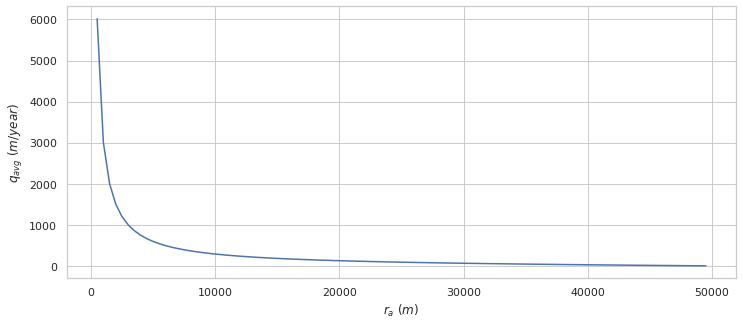

In [19]:
sns.set(style = 'whitegrid')

f, ax = plt.subplots(1, 1, figsize = (12, 5))
sns.lineplot(x = r_a, y = q_avg)

plt.xlabel('$r_a$ ($m$)')
plt.ylabel('$q_{avg}$ ($m / year$)')

Text(0, 0.5, '$t_{avg}$ ($year$)')

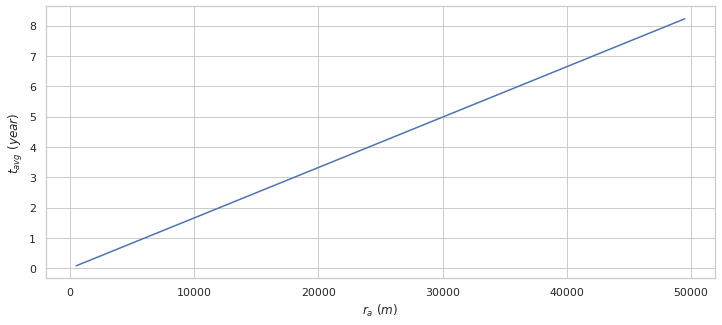

In [21]:
f, ax = plt.subplots(1, 1, figsize = (12, 5))
sns.lineplot(x = r_a, y = t_avg)

plt.xlabel('$r_a$ ($m$)')
plt.ylabel('$t_{avg}$ ($year$)')

Residence time의 평균은 다음과 같습니다.

In [22]:
print("mean of Residence time  : {} year".format(np.mean(t_avg)))

mean of Residence time  : 4.155186932056947 year
